In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import joblib
import os
import PIL
import PIL.Image
import pathlib
from sklearn.metrics import accuracy_score

# Import des datasets 

## jeu d'entrainement

In [2]:
train_data_dir = pathlib.Path("pic/Data/Train")
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  labels='inferred',
  label_mode = 'int',
  seed = 0,
  shuffle=None,
  image_size=(150, 150),
  batch_size=494)

Found 494 files belonging to 2 classes.


In [4]:
image_count = len(list(train_data_dir.glob('*/*.jpg')))
print(image_count)

494


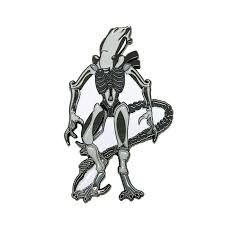

In [5]:
alien = list(train_data_dir.glob('Alien/*'))
PIL.Image.open(str(alien[0]))

In [6]:
normalization_layer = layers.Rescaling(1./255)

train_normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(train_normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.005392157 1.0


In [61]:
# ugly way to numpy
X_train_ds_np = np.array([x for x,_ in train_normalized_ds.unbatch()])
y_train_ds_np = np.array([y for _,y in train_normalized_ds.unbatch()])

## jeu de validation

In [8]:
valid_data_dir = pathlib.Path("pic/Data/Validation")

In [9]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
  valid_data_dir,
  labels='inferred',
  label_mode = 'int',
  seed = 0,
  shuffle=None,
  image_size=(150, 150),
  batch_size=200)

Found 200 files belonging to 2 classes.


In [10]:
image_count_v = len(list(valid_data_dir.glob('*/*.jpg')))
print(image_count_v)

200


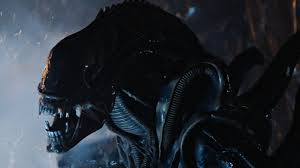

In [11]:
alien = list(valid_data_dir.glob('Alien/*'))
PIL.Image.open(str(alien[5]))

In [12]:
normalization_layer = layers.Rescaling(1./255)

valid_normalized_ds = valid_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(valid_normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [64]:
valid_normalized_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
# ugly way to numpy
X_valid_ds_np = np.array([x for x,_ in valid_normalized_ds.unbatch()])
y_valid_ds_np = np.array([y for _,y in valid_normalized_ds.unbatch()])

## jeu de test

In [15]:
test_data_dir = pathlib.Path("pic/Data/Test")

In [16]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  labels='inferred',
  label_mode = 'int',
  seed = 0,
  shuffle=None,
  image_size=(150, 150),
  batch_size=200)

Found 200 files belonging to 2 classes.


In [17]:
image_count_t = len(list(test_data_dir.glob('*/*.jpg')))
print(image_count_t)

200


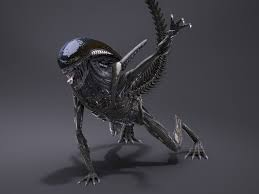

In [18]:
alien = list(test_data_dir.glob('Alien/*'))
PIL.Image.open(str(alien[33]))

In [19]:
normalization_layer = layers.Rescaling(1./255)

test_normalized_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(test_normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [31]:
# ugly way to numpy
X_test_ds_np = np.array([x for x,_ in test_normalized_ds.unbatch()])
y_test_ds_np = np.array([y for _,y in test_normalized_ds.unbatch()])

# Modèlisation

In [32]:
clf = tf.keras.models.Sequential([
    layers.Conv2D(filters=16, kernel_size=3, strides=1, activation='relu', input_shape=(150, 150, 3)),

    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'),

    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),

    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(units=512, activation='relu'),

    layers.Dense(units=1, activation='sigmoid')])

In [33]:
clf.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

In [35]:
epochs=100
history = clf.fit(
  X_train_ds_np,y_train_ds_np,
    batch_size=494,
  validation_data=(X_valid_ds_np,y_valid_ds_np),
  epochs=epochs,
)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.7004 - accuracy: 0.4980 - val_loss: 1.3183 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 1.2209 - accuracy: 0.5020 - val_loss: 2.0151 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 2.0713 - accuracy: 0.5000 - val_loss: 1.3345 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 1.3647 - accuracy: 0.5000 - val_loss: 0.7789 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 0.7793 - accuracy: 0.5000 - val_loss: 0.6749 - val_accuracy: 0.6550
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 0.6600 - accuracy: 0.7146 - val_loss: 0.7071 - val_accuracy: 0.5250
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 0.6855 - accuracy: 0.5466 - val_loss: 0.7096 - val_accuracy: 0.5250
Epoch 8/100
1/1 [=================

Best Validation Loss: 0.6347
Best Validation  Accuracy: 0.8826


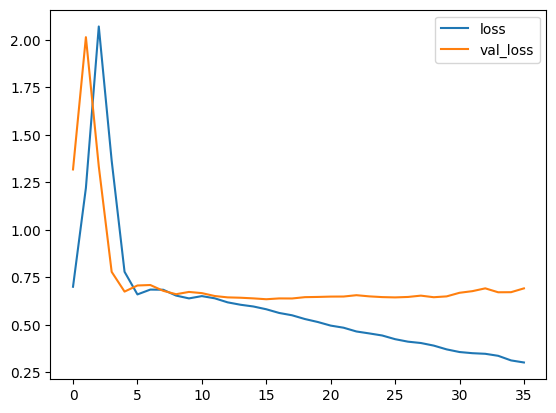

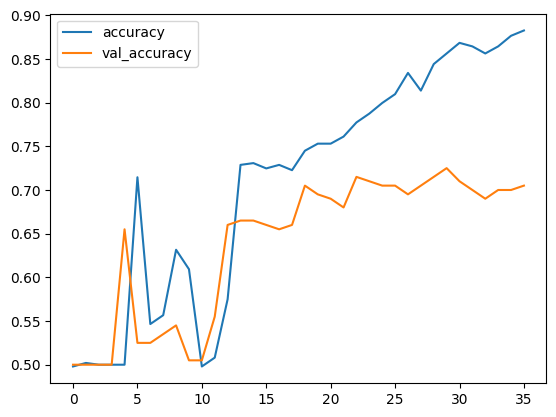

In [65]:
# traçage de la courbe d'apprentissage
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation  Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['accuracy'].max()))

In [37]:
joblib.dump(history.model,"clf_network.sav")

['clf_network.sav']

## Evaluation 

In [38]:
def get_actual_predicted_binary_labels(dataset,model): 
  """
    Create a list of actual ground truth values and the predictions from the model.

    Args:
      dataset: An iterable data structure, such as a TensorFlow Dataset, with features and labels.

    Return:
      Ground truth and predicted values for a particular dataset.
  """
  actual = [labels for _, labels in dataset.unbatch()]
  actual = tf.stack(actual, axis=0)

  predicted = model.predict(dataset)
  predicted = tf.concat(predicted, axis=0)
  predicted_test = np.where(predicted > 0.5, 1,0)

  return actual, predicted_test

1/1 [==============================] - 0s 411ms/step


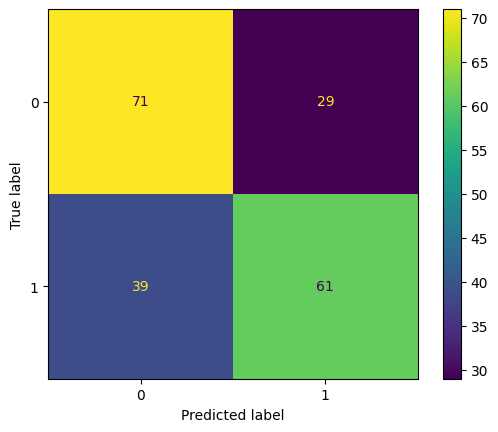

In [44]:
actual_valid, predicted_valid = get_actual_predicted_binary_labels(valid_normalized_ds,history.model)
ConfusionMatrixDisplay.from_predictions(actual_valid,predicted_valid)

In [40]:
accuracy_score(actual_valid,predicted_valid)

0.66

# Prediction sur le test

In [ ]:
clf = joblib.load("clf_network.sav")

1/1 [==============================] - 0s 394ms/step


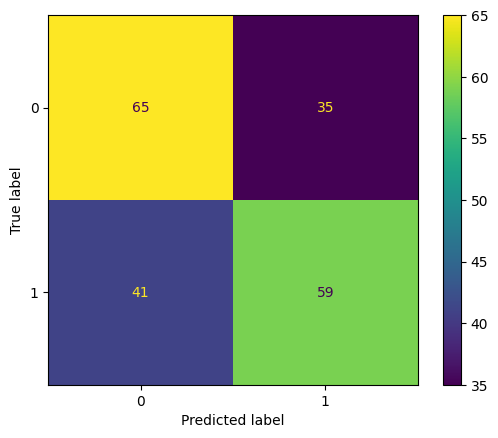

In [42]:
actual, predicted = get_actual_predicted_binary_labels(test_normalized_ds,history.model)
ConfusionMatrixDisplay.from_predictions(actual,predicted)

In [43]:
accuracy_score(actual,predicted)

0.62